In [57]:
import pandas as pd 

file1 = 'data/HIST_PAINEL_COVIDBR_2020_Parte1_02dez2023.csv'
file2 = 'data/HIST_PAINEL_COVIDBR_2020_Parte2_02dez2023.csv'

df = pd.concat([
    pd.read_csv(file1, delimiter = ';', on_bad_lines = 'skip'),
    pd.read_csv(file2, delimiter = ';', on_bad_lines = 'skip')
])

In [58]:
brasil = df[df['regiao'] == 'Brasil']
brasil

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-27,53,210147125.0,7484285,18479,191139,344,6475466.0,799545.0,NaN
149,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-28,53,210147125.0,7504833,20548,191570,431,6515370.0,777776.0,NaN
150,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-29,53,210147125.0,7563551,58718,192681,1111,6568898.0,744365.0,NaN
151,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-12-30,53,210147125.0,7619200,55649,193875,1194,6647538.0,723332.0,NaN


In [71]:
import matplotlib.pyplot as plt
from datetime import datetime

brasil= df[df['regiao'] == 'Brasil']
pop = brasil.iloc[0]['populacaoTCU2019']

date_str = '%y-%m-%d'
start = datetime.strptime(brasil.iloc[0]['data'][2:], date_str)
end = datetime.strptime(brasil.iloc[-1]['data'][2:], date_str)
delta = end - start
print(delta)

plt.plot(range(delta), brasil['casosAcumulado'])
plt.plot(range(delta), brasil['obitosAcumulado'])
plt.plot(range(delta), pop - brasil['obitosAcumulado'])


310 days, 0:00:00


TypeError: 'datetime.timedelta' object cannot be interpreted as an integer

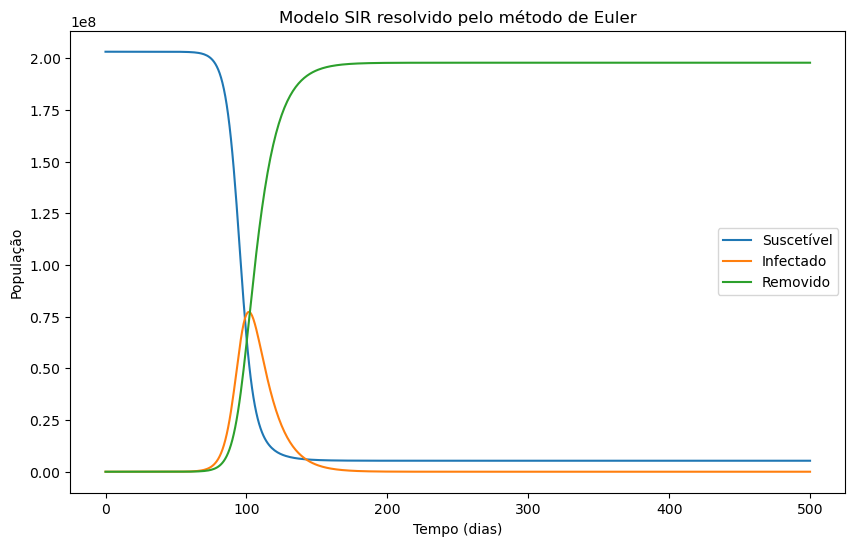

In [38]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.3
beta = 1 / 12
N = pop
jump_size = 1
num_of_days = 

def SIR_system(Sn,In,Rn):
    dSdt = -alpha*(Sn*In)/N
    dIdt = -dSdt - (beta*In)
    dRdt = beta*In
    return dSdt, dIdt, dRdt

def euler_method(system,So,Io,Ro,h,t_limit):
    t_values = np.arange(0,t_limit+h,h)
    current_S = So
    current_I = Io
    current_R = Ro
    for t in t_values:
        if t == 0:
            S_values = [So]
            I_values = [Io]
            R_values = [Ro]
        else:
            dSdt, dIdt, dRdt = system(S_values[-1],I_values[-1],R_values[-1])
            current_S += dSdt*h
            current_I += dIdt*h
            current_R += dRdt*h
            S_values.append(current_S)
            I_values.append(current_I)
            R_values.append(current_R)
    return t_values,S_values,I_values,R_values

t_values,S_values,I_values,R_values = euler_method(SIR_system,N-1,1,0,jump_size,num_of_days)

plt.figure(figsize=(10, 6))

plt.plot(t_values, S_values, label='Suscetível')
plt.plot(t_values, I_values, label='Infectado')
plt.plot(t_values, R_values, label='Removido')

plt.title('Modelo SIR resolvido pelo método de Euler')
plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.legend()

plt.show()